# RESTAURANT SENTIMENT ANALYSIS PROJECT

### IGNORING WARNINGS

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### READING TSV FILE AND CHECKING INFO

In [3]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [6]:
df.shape

(1000, 2)

In [7]:
df.duplicated().sum()

4

### CREATING A FUNTION TO PREPROCESS THE TEXT DATA

In [11]:
import re

In [12]:
def preprocess_text(st):
    st2 = st.lower()
    st3 = re.sub('[^a-z ]', '', st2)
    return st3

In [13]:
preprocess_text(' !! WELCOME TO SENTIMENT ANALYSIS CLASS !! ')

'  welcome to sentiment analysis class  '

### APPLYING THE FUNCTION TO DATAFRAME

In [14]:
df['pre'] = df ['Review'].apply(preprocess_text)

In [15]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### APPLYING THE TFIDF VECTORIZER ON PREPROCESS TEXT

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x_pre = tf.fit_transform(df['pre']).toarray()
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
x_pre.shape

(1000, 2046)

In [18]:
y = df['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

### APPLYING TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y,
                                                test_size=0.2,
                                                random_state=21)

In [20]:
xtrain.shape

(800, 2046)

In [21]:
xtest.shape

(200, 2046)

In [22]:
xtest.shape[1]

2046

### CREATING A NEURAL NETWORK

In [23]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [27]:
model = Sequential()

# CREATING INPUT LAYER
model.add(Input(shape=(xtrain.shape[1],)))

# CREATING DENSE LAYER 1 
model.add(Dense(units=128, activation='relu'))

# ADDING DROPOUT LAYER 1
model.add(Dropout(rate=0.5))

# CREATING A DENSE LAYER 2
model.add(Dense(units=64, activation='relu'))

# CREATING DROPOUT LAYER 2 
model.add(Dropout(rate=0.4))

# CREATING OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262016    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### COMPILING THE MODEL

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
es = EarlyStopping(monitor='value_loss', patience=15)

In [31]:
hist = model.fit(xtrain,ytrain, validation_split=0.1,
                 epochs=100, callbacks=[es])

Epoch 1/100
23/23 [==============================] - 8s 100ms/step - loss: 0.6904 - accuracy: 0.5500 - val_loss: 0.6892 - val_accuracy: 0.5375
Epoch 2/100
23/23 [==============================] - 1s 54ms/step - loss: 0.6732 - accuracy: 0.6958 - val_loss: 0.6757 - val_accuracy: 0.6000
Epoch 3/100
23/23 [==============================] - 1s 26ms/step - loss: 0.6290 - accuracy: 0.8111 - val_loss: 0.6203 - val_accuracy: 0.7750
Epoch 4/100
23/23 [==============================] - 0s 20ms/step - loss: 0.5073 - accuracy: 0.9194 - val_loss: 0.5431 - val_accuracy: 0.7625
Epoch 5/100
23/23 [==============================] - 0s 19ms/step - loss: 0.3434 - accuracy: 0.9347 - val_loss: 0.4393 - val_accuracy: 0.8000
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.1935 - accuracy: 0.9694 - val_loss: 0.4203 - val_accuracy: 0.7750
Epoch 7/100
23/23 [==============================] - 0s 22ms/step - loss: 0.1158 - accuracy: 0.9736 - val_loss: 0.4389 - val_accuracy: 0.7750
Epoch

### EVALUATE THE MODEL

In [32]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 1s 22ms/step - loss: 0.1257 - accuracy: 0.9725


[0.12573276460170746, 0.9725000262260437]

In [33]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 12ms/step - loss: 0.8758 - accuracy: 0.8000


[0.875836968421936, 0.800000011920929]

### PREDICTING THE PROBABILITY

In [35]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

7/7 [==============================] - 0s 7ms/step


In [36]:
yprob_train[0:5]

array([[9.999678e-01],
       [9.999998e-01],
       [1.000000e+00],
       [7.632337e-08],
       [6.312765e-07]], dtype=float32)

In [37]:
yprob_test[0:5]

array([[8.9132749e-03],
       [3.3770252e-07],
       [9.9992055e-01],
       [9.9999946e-01],
       [9.9999988e-01]], dtype=float32)

### PREDICTING THE RESULTS

In [41]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [42]:
ypred_train[0:5]

[1, 1, 1, 0, 0]

In [43]:
ytrain[0:5]

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [44]:
ypred_test[0:5]

[0, 0, 1, 1, 1]

In [45]:
ytest[0:5]

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### PLOTTING THE CONFUSION MATRIX

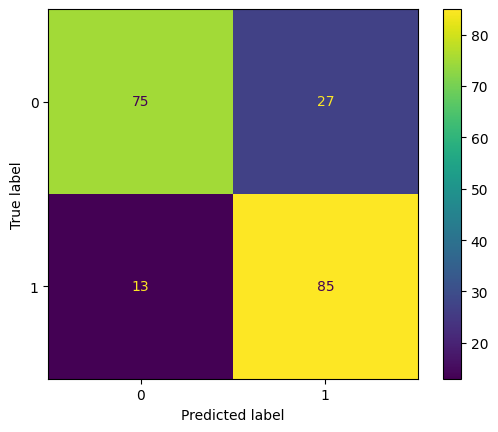

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### PRINTING THE CLASSIFICATION REPORT

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.76      0.87      0.81        98

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



### PREDICTING THE USER DEFINED SENTIMENTS

In [51]:
def predict_sentiment(model, tf):
    st = input('PLEASE ENTER THE REVIEW : ')
    st2 = preprocess_text(st)
    xnew = tf.transform([st2]).toarray()
    prob = model.predict([xnew])

    print(f'PROBABILITY THAT STATEMENT IS POSITIVE : {prob}')
    if prob>=0.5:
        print(' THE GIVEN REVIEW IS POSITIVE')
    else :
        print('THE GIVEN REVIEW IS NEGATIVE')

In [52]:
predict_sentiment(model, tf)

1/1 [==============================] - 0s 104ms/step
PROBABILITY THAT STATEMENT IS POSITIVE : [[0.9106735]]
 THE GIVEN REVIEW IS POSITIVE


### SAVING THE MODEL FOR FUTURE USE

In [53]:
model.save('SENTIMENT MODEL.keras')

### LOADING THE MODEL FOR FUTURE USE

In [54]:
from keras.models import load_model
m = load_model("SENTIMENT MODEL.keras")
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262016    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
